In [2]:
import pandas as pd

# Load the dataset from the provided CSV file
data = pd.read_csv('C:/Users/Abdul/Downloads/IRIS.csv')

# Preview the data
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [3]:
from sklearn.preprocessing import LabelEncoder

# Separate features and labels
X = data.drop('species', axis=1)  # Assuming 'species' is the label column
y = data['species']

# Encode the labels (if necessary)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Display encoded labels
print(y_encoded[:5])

[0 0 0 0 0]


In [4]:
from sklearn.model_selection import train_test_split

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Check the shape of the split data
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (120, 4)
Test set size: (30, 4)


In [5]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
model = LogisticRegression(max_iter=200)

# Train the model on the training data
model.fit(X_train, y_train)

# Check model training completion
print("Model trained successfully!")

Model trained successfully!


In [6]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Show first few predictions
print(y_pred[:5])

[1 0 2 1 1]


In [7]:
from sklearn.metrics import classification_report

# Generate a classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



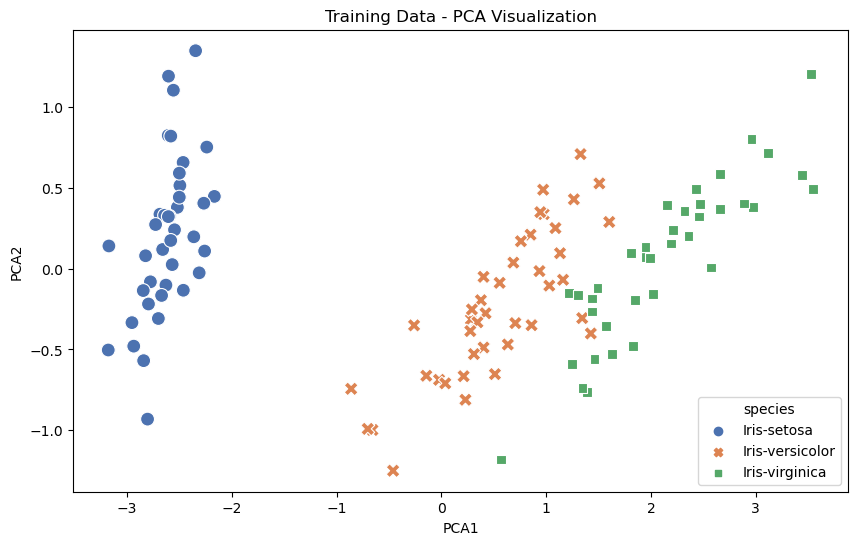

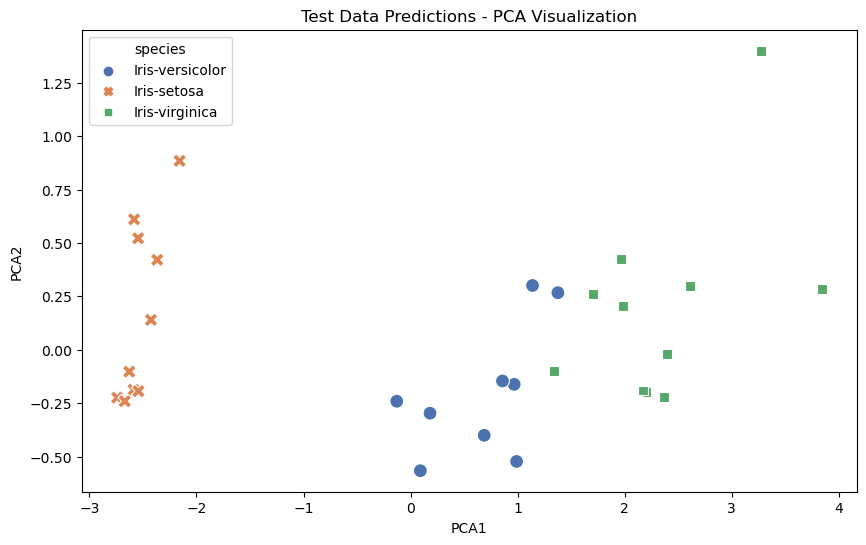

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 8: Visualization of classification results

# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Combine the training data and labels
train_data = pd.DataFrame(X_train_pca, columns=['PCA1', 'PCA2'])
train_data['species'] = label_encoder.inverse_transform(y_train)

# Combine the test data and predicted labels
test_data = pd.DataFrame(X_test_pca, columns=['PCA1', 'PCA2'])
test_data['species'] = label_encoder.inverse_transform(y_pred)

# Visualize the training data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='PCA1', y='PCA2', hue='species', style='species', palette='deep', s=100)
plt.title("Training Data - PCA Visualization")
plt.show()

# Visualize the test data with predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(data=test_data, x='PCA1', y='PCA2', hue='species', style='species', palette='deep', s=100)
plt.title("Test Data Predictions - PCA Visualization")
plt.show()